In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [187]:
# Discover 
# 1. outliers in both 'credit score' and 'age' 
# 2. large amount of 0 balance data
# 3. no duplicates or null values
# 4. Strong relationship between 'Age' and 'Exited', 'NumOfProducts' and 'Balance'
# 5. People with 4 products tend to more likely to exit
# 6. More data points in France

In [2]:
df = pd.read_csv('Churn_Modelling 2.csv')

In [3]:
#Preview data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#drop unrelated data feature
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [16]:
#check each feature's data type
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [165]:
#check null rows
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
gender             0
dtype: int64

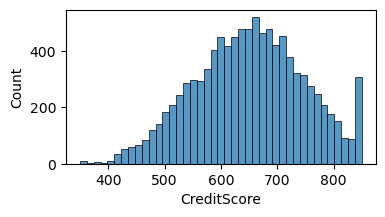

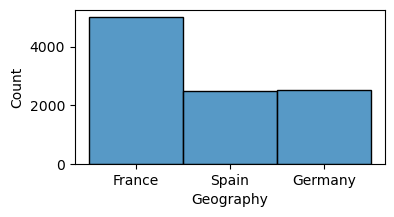

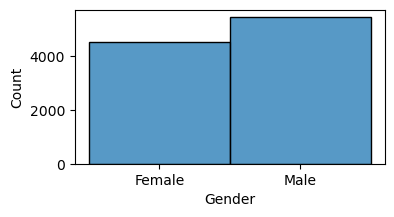

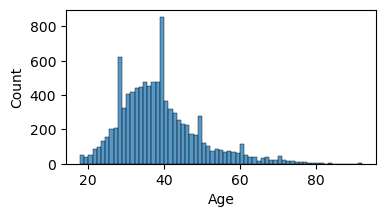

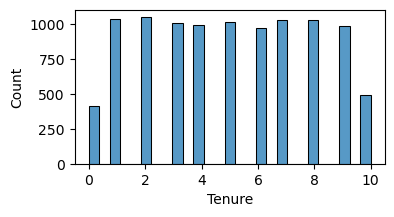

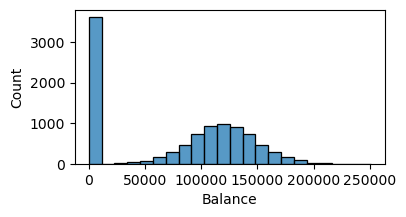

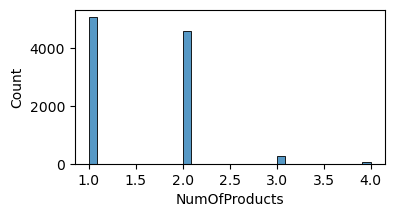

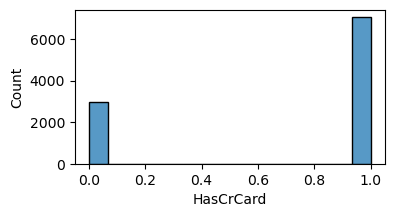

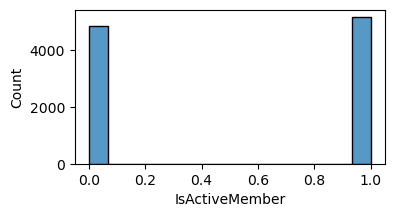

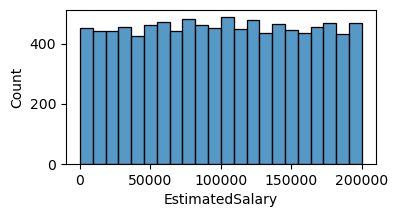

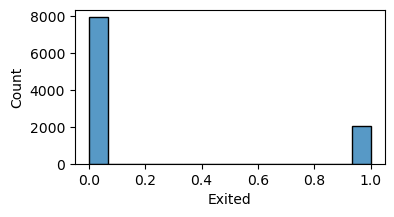

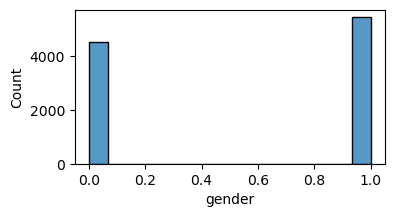

In [178]:
#check each feature distribution to see any unrealistic recording
for i in df.columns.tolist():
    plt.figure(figsize=(4,2))
    sns.histplot(data=df,x=i)
    plt.show()

In [158]:
#seperating feature to categorical and numerical 
num_list= df.select_dtypes(['int64','float64']).columns.tolist()
cat_list= df.select_dtypes(['object']).columns.tolist()

In [159]:
#check the numerical column names
num_list

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'gender']

In [160]:
#check categorical column names
cat_list

['Geography', 'Gender']

In [131]:
#statistical distribution of each numerical column
df[num_list].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


In [173]:
df.shape

(10000, 12)

In [176]:
#check and remove duplicates
df=df.drop_duplicates()

In [177]:
df.shape

(10000, 12)

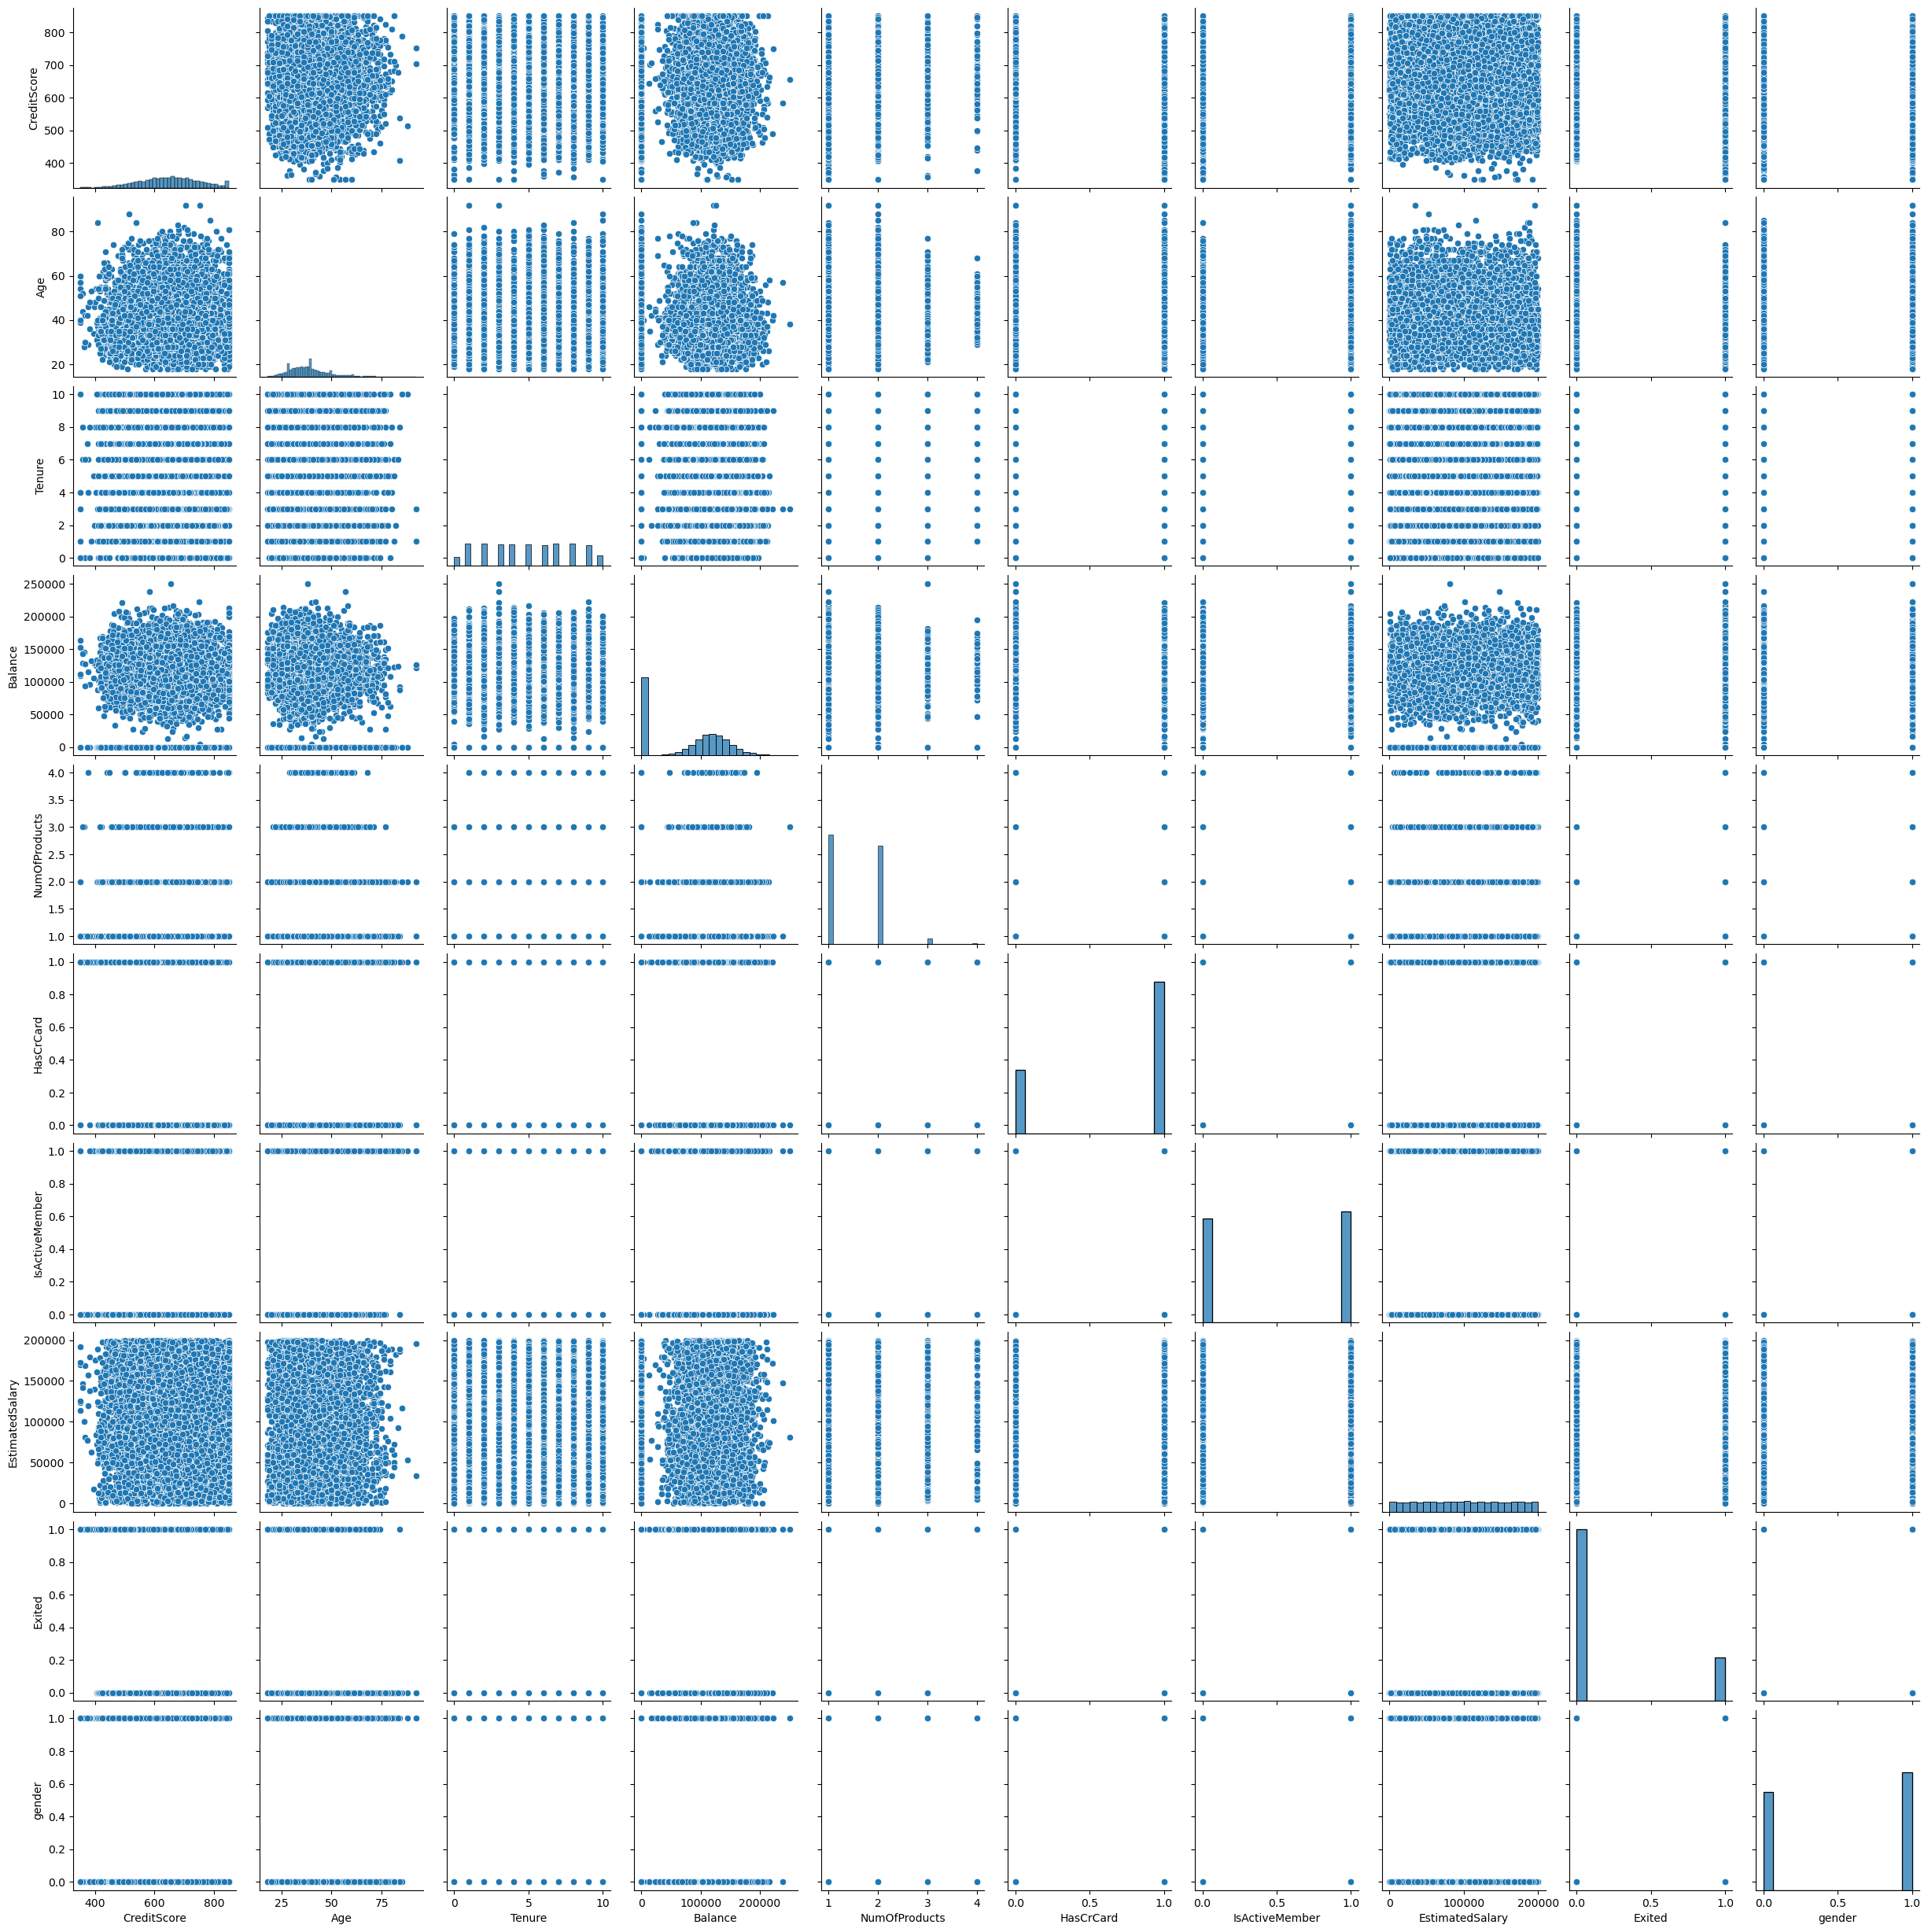

In [179]:
#Check feature correlations
sns.pairplot(df)

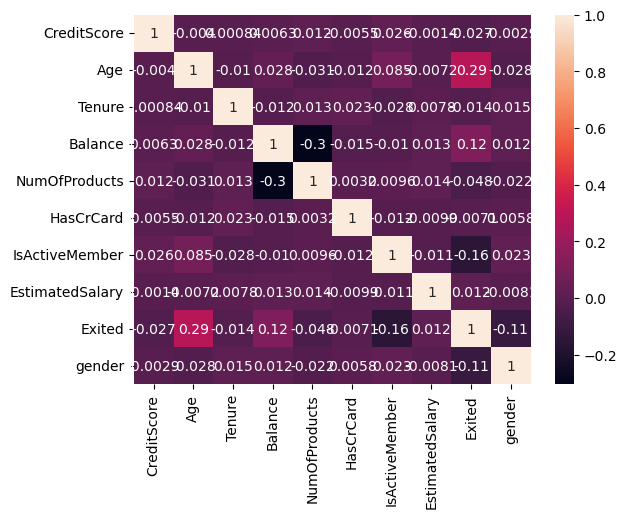

In [166]:
#heatmap correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

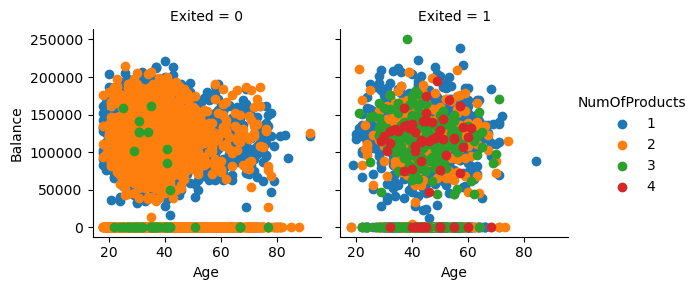

In [186]:
#deeper correlation study from heatmap matrix
g = sns.FacetGrid(df,col='Exited',hue='NumOfProducts')
g.map(plt.scatter, 'Age','Balance')
g.add_legend()
plt.show()

In [161]:
##statistical distribution of each cattegorical column
df[cat_list].value_counts()

Geography  Gender
France     Male      2753
           Female    2261
Spain      Male      1388
Germany    Male      1316
           Female    1193
Spain      Female    1089
dtype: int64

In [163]:
df.groupby(['Geography'],as_index=False).mean()

,Geography,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender
0,France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548,0.549063
1,Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432,0.524512
2,Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734,0.560355


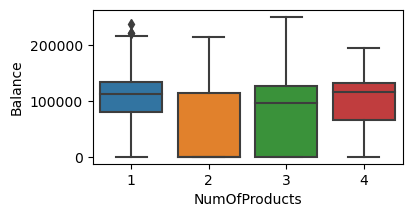

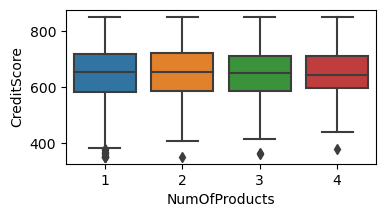

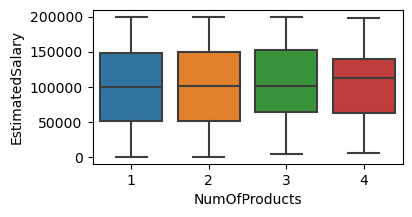

In [132]:
#understand distribtion of each account feature based on NumOfProducts
ycheck = ['Balance','CreditScore','EstimatedSalary']
for i in ycheck:
    plt.figure(figsize=(4,2))
    sns.boxplot(data=df, x='NumOfProducts',y=i)
    plt.show()

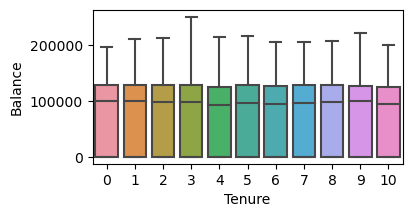

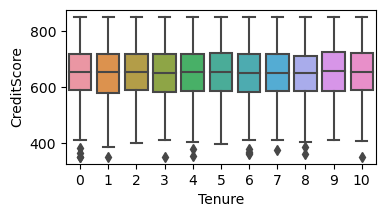

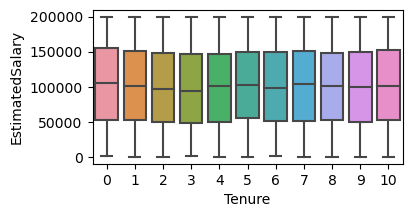

In [133]:
#understand distribtion of each account feature based on tenure
ycheck = ['Balance','CreditScore','EstimatedSalary']
for i in ycheck:
    plt.figure(figsize=(4,2))
    sns.boxplot(data=df, x='Tenure',y=i)
    plt.show()

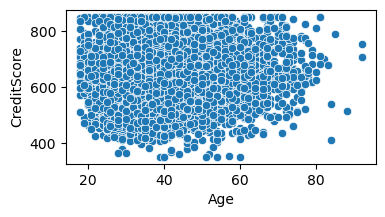

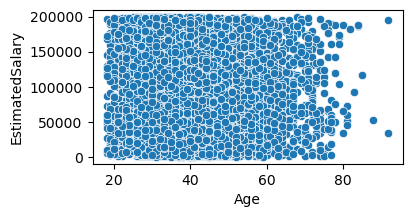

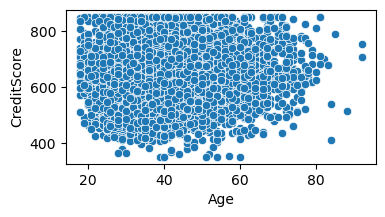

In [124]:
#how age affects each account feature
check = ['CreditScore','EstimatedSalary','CreditScore']
for i in check:
    plt.figure(figsize=(4,2))
    sns.scatterplot(data=df, x='Age',y=i)
    plt.show()

In [44]:
#encode gender column
gender = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
# df['Result'] = df['Maths'].apply(lambda x: 'Pass' if x>=5 else 'Fail')

In [46]:
#create new column with encoded gender column
df['gender']=gender

In [57]:
#inspect updated dataframe
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [189]:
df=df.drop('Gender',axis=1)

In [190]:
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


<AxesSubplot:xlabel='gender', ylabel='CreditScore'>

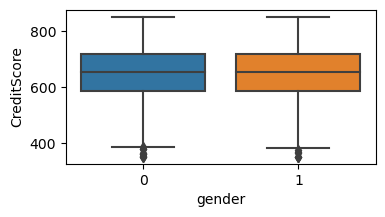

In [138]:
#inspect gender to credit score relation
plt.figure(figsize=(4,2))
sns.boxplot(data=df,x='gender',y='CreditScore')

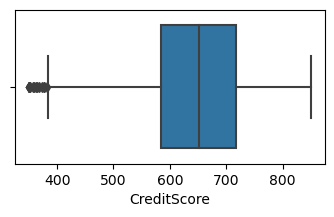

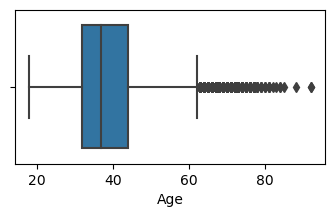

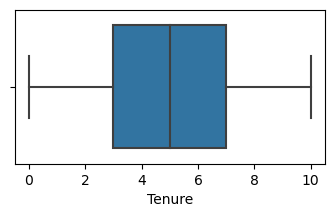

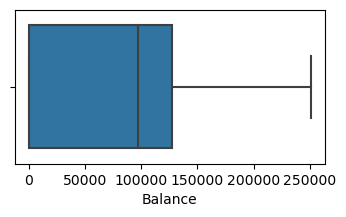

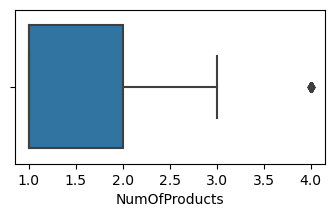

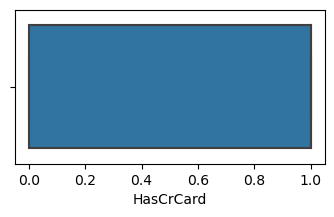

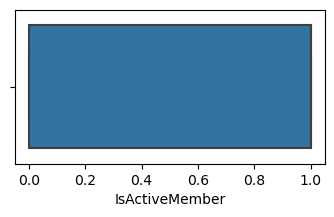

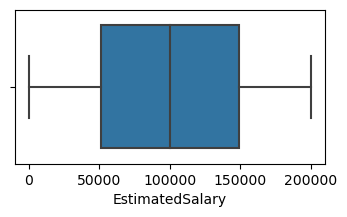

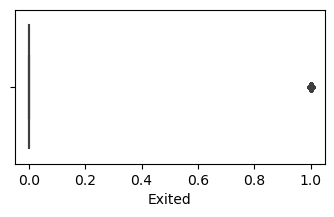

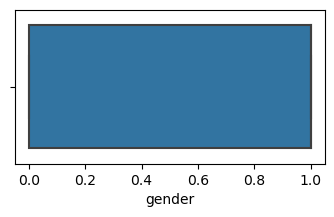

In [137]:
#check for outliers
for i in num_list: 
    plt.figure(figsize=(4,2))
    sns.boxplot(data=df,x=i)

In [94]:
#create new table with CreditScore outlier removed
c_q1 = df.iloc[:,0].quantile(0.25)
c_q3 = df.iloc[:,0].quantile(0.75)
c_iqr = c_q3-c_q1
c_l_out = c_q1-1.5*c_iqr
c_u_out = c_q3+1.5*c_iqr
c_out_df = df[(df['CreditScore']<c_u_out) & (df['CreditScore']>c_l_out)]
c_out_df.shape

(9984, 12)

In [95]:
#create new table with Age outlier removed
a_q1 = df['Age'].quantile(0.25)
a_q3 = df['Age'].quantile(0.75)
a_iqr = a_q3-a_q1
a_l_out = a_q1-1.5*a_iqr
a_u_out = a_q3+1.5*a_iqr
a_out_df = df[(df['Age']<a_u_out) & (df['Age']>a_l_out)]
a_out_df.shape

(9589, 12)

In [191]:
df.to_csv('df.csv')

In [192]:
c_out_df.to_csv('c_out_df.csv')

In [193]:
a_out_df.to_csv('a_out_df.csv')